In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


In [10]:
Data = pd.read_csv('heart_disease.csv')
Data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
Data.size

4242

In [5]:
Data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
Data.shape

(303, 14)

In [8]:
Data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
Data.duplicated().sum()

1

In [11]:
Data.drop_duplicates()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


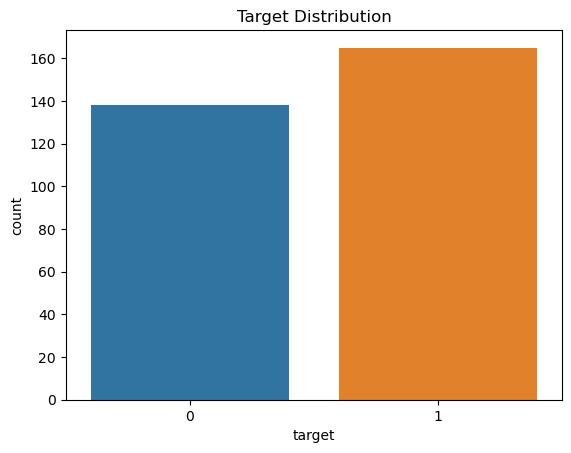

In [13]:
sns.countplot(x='target', data=Data)
plt.title('Target Distribution')
plt.show()

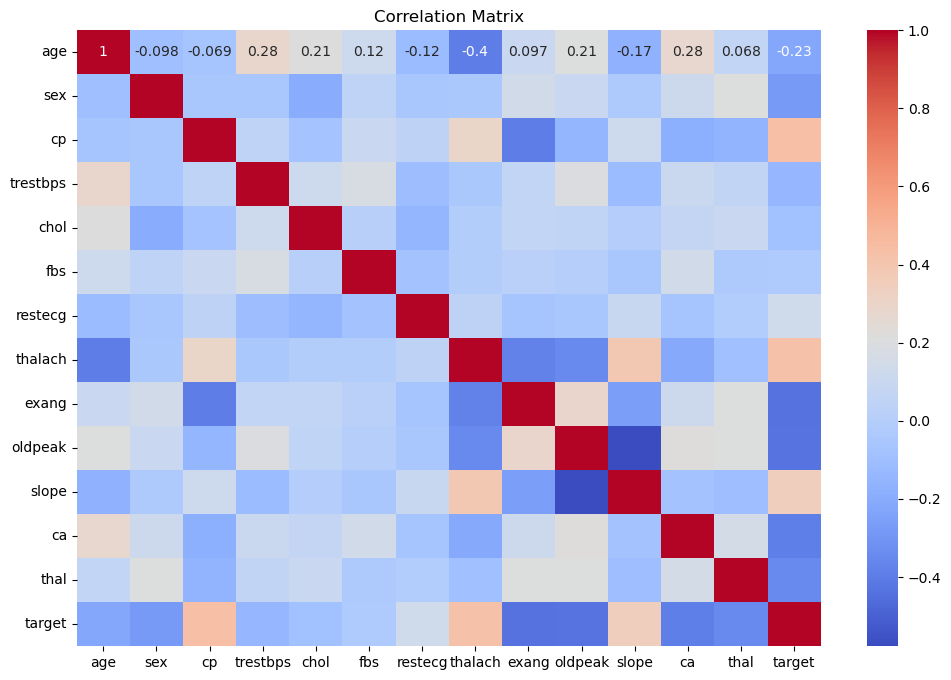

In [15]:
plt.figure(figsize=(12, 8))
sns.heatmap(Data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

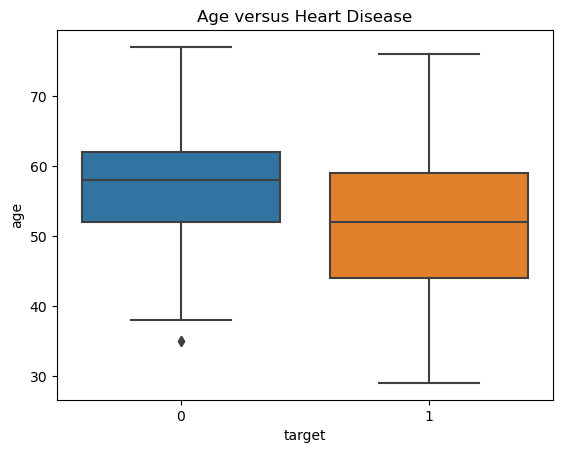

In [16]:
sns.boxplot(x='target', y='age', data=Data)
plt.title("Age versus Heart Disease")
plt.show()


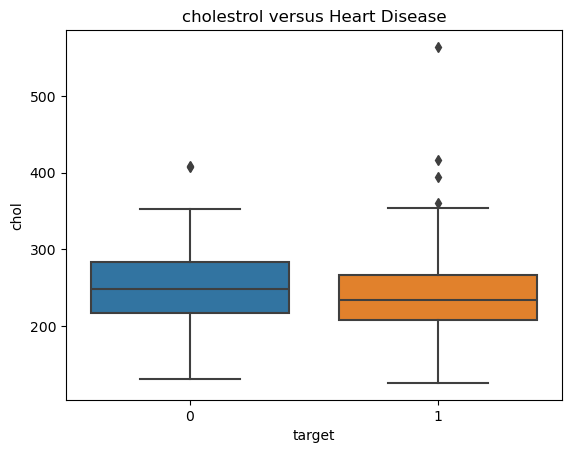

In [17]:
sns.boxplot(x='target', y='chol', data=Data)
plt.title("cholestrol versus Heart Disease")
plt.show()

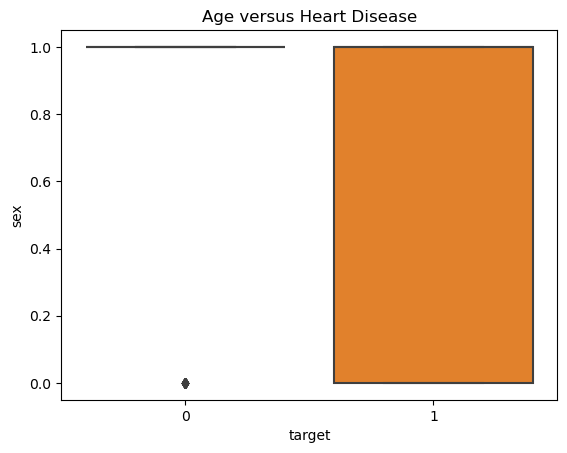

In [18]:
sns.boxplot(x='target', y='sex', data=Data)
plt.title("Age versus Heart Disease")
plt.show()

AttributeError: 'numpy.int64' object has no attribute 'startswith'

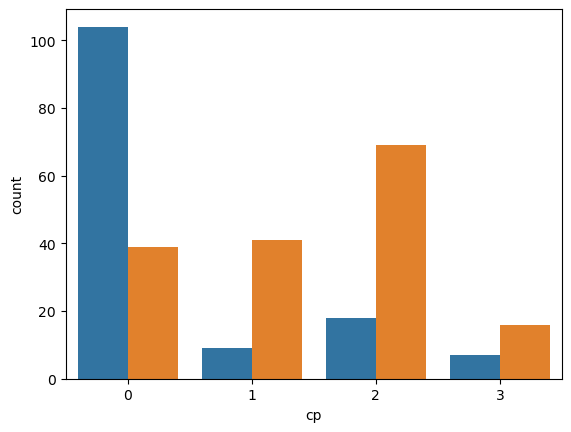

In [19]:
sns.countplot(x='cp', hue='target', data=Data)
plt.title("Chest pain versus Heart Disease")
plt.show()

In [14]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#split features and target
X = Data.drop('target', axis=1)
y = Data['target']
#splitting data
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)
#Scale features
scaler =StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [25]:

from sklearn.linear_model import LogisticRegression
#Training the model
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [29]:
# prediction
y_predict_lr = lr_model.predict(X_test_scaled)
#Evaluation of model
print("Accuracy of model is :", accuracy_score(y_test, y_predict_lr))
print("\nConfusion matrix of model is :", confusion_matrix(y_test, y_predict_lr))
print("\nClassification Report of model is :", classification_report(y_test, y_predict_lr))


Accuracy of model is : 0.8032786885245902

Confusion matrix of model is : [[19  9]
 [ 3 30]]

Classification Report of model is :               precision    recall  f1-score   support

           0       0.86      0.68      0.76        28
           1       0.77      0.91      0.83        33

    accuracy                           0.80        61
   macro avg       0.82      0.79      0.80        61
weighted avg       0.81      0.80      0.80        61



In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
#Setting up parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['12'],
    'solver': ['liblinear', 'lbfgs']
}
#Creation of gridsearchcv object
grid_search = GridSearchCV(
    estimator = LogisticRegression(),
    param_grid = param_grid,
    cv = 5,
    scoring = 'accuracy',
    n_jobs = -1
)
#Fitting the grid search to training data
grid_search.fit(X_test_scaled,y_train)
#Best Parameters
print("Best parameters are", grid_search.best_params_)
#using best model
best_lr = grid_search.best_estimator_
y_pred_tuned = best_lr.predict(X_test_scaled)
#Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy of model is :", accuracy_score(y_test, y_predict_lr))
print("\nConfusion matrix of model is :", confusion_matrix(y_test, y_predict_lr))
print("\nClassification Report of model is :", classification_report(y_test, y_predict_lr))


ValueError: Found input variables with inconsistent numbers of samples: [61, 242]

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#split features and target
X = Data.drop('target', axis=1)
y = Data['target']
#splitting data
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)
#Scale features
scaler =StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [19]:
# STEP 1: IMPORT EVERYTHING AGAIN
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# STEP 2: SPLIT FEATURES AND TARGET
X = Data.drop('target', axis=1)
y = Data['target']

# STEP 3: SPLIT INTO TRAIN/TEST SETS
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# STEP 4: SCALE FEATURES
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# STEP 5: DEFINE GRID PARAMETERS
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['liblinear', 'lbfgs']
}

# STEP 6: RUN GRID SEARCH CV
grid_search = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train)

# STEP 7: EVALUATE BEST MODEL
best_lr = grid_search.best_estimator_
y_pred_tuned = best_lr.predict(X_test_scaled)

print("✅ Best Parameters:", grid_search.best_params_)
print("📊 Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("📄 Classification Report:\n", classification_report(y_test, y_pred_tuned))
print("📉 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tuned))

✅ Best Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
📊 Accuracy: 0.7868852459016393
📄 Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.64      0.73        28
           1       0.75      0.91      0.82        33

    accuracy                           0.79        61
   macro avg       0.80      0.78      0.78        61
weighted avg       0.80      0.79      0.78        61

📉 Confusion Matrix:
 [[18 10]
 [ 3 30]]


In [24]:
y_test_reset = y_test.reset_index(drop=True)
sample_data = X_test_scaled[0:5]
sample_true = y_test_reset[0:5]
#predict with sampled data
sample_preds = best_lr.predict(sample_data)
Data_results = pd.DataFrame({
    'True Label': sample_true.values,
    'Predicted': sample_preds
})
print(Data_results)

   True Label  Predicted
0           0          0
1           0          0
2           0          0
3           0          1
4           0          1


In [26]:
Data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [39]:
first5_indices = X_test.index[0:5]
sample_data = X_test_scaled[0:5]
sample_true = y_test.loc[first5_indices]
#predict with sampled data
sample_preds = best_lr.predict(sample_data)
Data_results = pd.DataFrame({
    'index': First5_indices,
    'True Label': sample_true,
    'Predicted': sample_preds
})
print(Data_results)

NameError: name 'First5_indices' is not defined

In [33]:
print(y_test.head())
print(y_test.reset_index(drop=True).head())

179    0
197    0
285    0
194    0
188    0
Name: target, dtype: int64
0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64


In [42]:
import pandas as pd
f5 = X_test.index[:5]
sample_data = X_test_scaled[0:5]
sample_true = y_test.loc[f5]
#predict with sampled data
sample_preds = best_lr.predict(sample_data)
Data_results = pd.DataFrame({
    'index': f5,
    'True Label': sample_true,
    'Predicted': sample_preds
})
print(Data_results)

     index  True Label  Predicted
179    179           0          0
197    197           0          0
285    285           0          0
194    194           0          1
188    188           0          1


In [52]:
from sklearn.ensemble import RandomForestClassifier
X = Data.drop('target', axis=1)
y = Data['target']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred_rf = rf_model.predict(X_test)
print("📊 Accuracy:", accuracy_score(y_test, y_pred_rf))
print("📄 Classification Report:\n", classification_report(y_test, y_pred_rf))
print("📉 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

📊 Accuracy: 0.8360655737704918
📄 Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.68      0.79        28
           1       0.78      0.97      0.86        33

    accuracy                           0.84        61
   macro avg       0.87      0.82      0.83        61
weighted avg       0.86      0.84      0.83        61

📉 Confusion Matrix:
 [[19  9]
 [ 1 32]]


In [56]:
print(X_train.shape)

(242, 13)


In [57]:
print(y_train.shape)

(242,)


In [63]:
from sklearn.model_selection import GridSearchCV
#Setting up parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'criterion': ['gini', 'entropy']
}
#Creation of gridsearchcv object
grid_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1,
    error_score='raise'
)
#Fitting the grid search to training data
grid_rf.fit(X_train, y_train)
#Best Parameters
print("Best parameters are", grid_rf.best_params_)
#using best model
best_rf = grid_rf.best_estimator_


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters are {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [64]:
grid_rf.best_score_

0.8473639455782314

In [65]:
y_pred_rf = best_rf.predict(X_test)
print("📊 Accuracy:", accuracy_score(y_test, y_pred_rf))
print("📄 Classification Report:\n", classification_report(y_test, y_pred_rf))
print("📉 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

📊 Accuracy: 0.819672131147541
📄 Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.64      0.77        28
           1       0.76      0.97      0.85        33

    accuracy                           0.82        61
   macro avg       0.85      0.81      0.81        61
weighted avg       0.85      0.82      0.81        61

📉 Confusion Matrix:
 [[18 10]
 [ 1 32]]


In [66]:
pip install streamlit


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [67]:
#Deployment Stage
import joblib 


In [76]:
#Savung the model
joblib.dump(best_rf, 'heart_disease_model.pkl')

['heart_disease_model.pkl']

In [77]:
#Craeting the app.py fileimport streamlit as st
import streamlit as st
import joblib
import numpy as np
# Load the model
model = joblib.load('heart_disease_model.pkl')
# App title and subtitle
st.set_page_config(page_title="Heart Disease Predictor", page_icon="❤️", layout="centered")
st.markdown("<h1 style='text-align: center;'>❤️ Heart Disease Risk Prediction</h1>", unsafe_allow_html=True)
st.markdown("<h4 style='text-align: center; color: gray;'>Enter the patient's medical data below to predict the likelihood of heart disease.</h4>", unsafe_allow_html=True)
st.write("")
# Split inputs into 2 columns
col1, col2 = st.columns(2)
with col1:
    age = st.number_input("Age", 20, 100, 50)
    sex = st.selectbox("Sex", ["Female", "Male"])
    cp = st.selectbox("Chest Pain Type", ["Typical Angina (0)", "Atypical Angina (1)", "Non-anginal (2)", "Asymptomatic (3)"])
    trestbps = st.number_input("Resting Blood Pressure", 80, 200, 120)
    chol = st.number_input("Cholesterol (mg/dl)", 100, 400, 200)
    fbs = st.selectbox("Fasting Blood Sugar > 120?", ["No (0)", "Yes (1)"])
with col2:
    restecg = st.selectbox("Resting ECG", ["Normal (0)", "ST-T Abnormality (1)", "Left Ventricular Hypertrophy (2)"])
    thalach = st.number_input("Max Heart Rate Achieved", 70, 210, 150)
    exang = st.selectbox("Exercise Induced Angina", ["No (0)", "Yes (1)"])
    oldpeak = st.slider("ST Depression (Oldpeak)", 0.0, 6.0, 1.0, step=0.1)
    slope = st.selectbox("Slope of Peak Exercise ST", ["Upsloping (0)", "Flat (1)", "Downsloping (2)"])
    ca = st.selectbox("Major Vessels Colored (0–3)", [0, 1, 2, 3])
    thal = st.selectbox("Thalassemia", ["Normal (1)", "Fixed Defect (2)", "Reversible Defect (3)"])
# Map inputs back to model-friendly values
sex = 1 if sex == "Male" else 0
cp = int(cp.split("(")[1][0])
fbs = 1 if fbs == "Yes (1)" else 0
restecg = int(restecg.split("(")[1][0])
exang = 1 if exang == "Yes (1)" else 0
slope = int(slope.split("(")[1][0])
thal = int(thal.split("(")[1][0])
# Prediction section
if st.button("🔍 Predict Risk"):
    input_data = np.array([[age, sex, cp, trestbps, chol, fbs, restecg,
                            thalach, exang, oldpeak, slope, ca, thal]])
    prediction = model.predict(input_data)[0]
    proba = model.predict_proba(input_data)[0][1]  # Probability of class 1
    st.write("---")
    if prediction == 1:
        st.error(f"⚠️ High Risk: The model predicts a {round(proba*100)}% chance of heart disease.")
    else:
        st.success(f"✅ Low Risk: The model predicts a {round((1-proba)*100)}% chance of no heart disease.")
    st.write("---")
    st.markdown("*Note: This is a data-driven prediction and should not replace medical advice.*")

In [78]:
import os
os.getcwd()

'C:\\Users\\O M E N\\ML models'

In [79]:
import os
os.getcwd()

'C:\\Users\\O M E N\\ML models'

In [ ]:

  Local URL: http://localhost:8501
  Network URL: http://172.20.10.2:8501